
Rekomendasi Skema Warna Ruangan:
----------------------------------------------------------------------------------------------------
        Ruangan    Mood Warna Primer Warna Sekunder Warna Aksen  Brightness  \
0   Kamar Tidur  Hangat      #FFA07A        #F4A460     #FF8C00        0.63   
1   Kamar Tidur  Dingin      #ADD8E6        #98FB98     #AFEEEE        0.80   
2   Kamar Tidur  Netral      #DCDCDC        #C0C0C0     #778899        0.72   
3    Ruang Tamu  Hangat      #FFA07A        #F4A460     #FF8C00        0.63   
4    Ruang Tamu  Dingin      #ADD8E6        #98FB98     #AFEEEE        0.80   
5    Ruang Tamu  Netral      #DCDCDC        #C0C0C0     #778899        0.72   
6         Dapur  Hangat      #FFA07A        #F4A460     #FF8C00        0.63   
7         Dapur  Dingin      #ADD8E6        #98FB98     #AFEEEE        0.80   
8         Dapur  Netral      #DCDCDC        #C0C0C0     #778899        0.72   
9   Ruang Kerja  Hangat      #FFA07A        #F4A460     #FF8C00        0.63

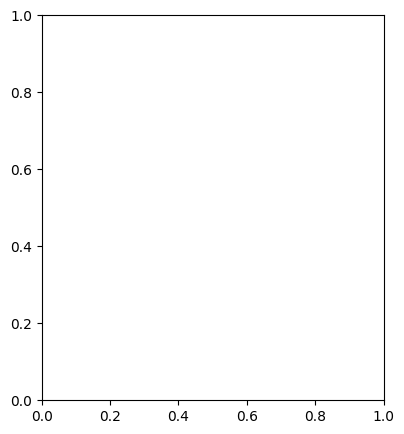

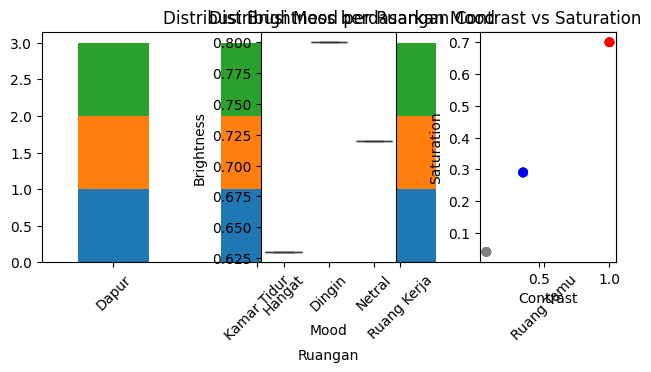

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import rgb2hex, hex2color

# Parameter RNG
a = 5  # Konstanta pengali
m = 8  # Modulus
Z0 = random.randint(1, 100)  # Seed acak

# Database warna
color_database = {
    'Hangat': {
        'Primer': ['#FF6B6B', '#FFA07A', '#FFB6C1'],  # Merah muda, Salmon, Pink muda
        'Sekunder': ['#F4A460', '#DEB887', '#D2B48C'],  # Saddle brown, Burlywood, Tan
        'Aksen': ['#FF7F50', '#FF8C00', '#FFA500']  # Coral, Dark orange, Orange
    },
    'Dingin': {
        'Primer': ['#87CEEB', '#ADD8E6', '#B0E0E6'],  # Sky blue, Light blue, Powder blue
        'Sekunder': ['#98FB98', '#90EE90', '#8FBC8F'],  # Pale green, Light green, Dark sea green
        'Aksen': ['#E0FFFF', '#AFEEEE', '#B0C4DE']  # Light cyan, Pale turquoise, Light steel blue
    },
    'Netral': {
        'Primer': ['#F5F5F5', '#DCDCDC', '#D3D3D3'],  # White smoke, Gainsboro, Light grey
        'Sekunder': ['#C0C0C0', '#A9A9A9', '#808080'],  # Silver, Dark grey, Grey
        'Aksen': ['#696969', '#778899', '#708090']  # Dim grey, Light slate grey, Slate grey
    }
}

def generate_random_number(Z0, a, m, n):
    """
    Menghasilkan bilangan acak menggunakan LCG
    """
    results = []
    Z = Z0

    for i in range(n):
        Z = (a * Z) % m
        U = Z / m
        results.append(U)

    return results

def generate_color_scheme(room_type, mood):
    """
    Menghasilkan skema warna berdasarkan tipe ruangan dan mood
    """
    random_numbers = generate_random_number(Z0, a, m, 3)  # Untuk primer, sekunder, aksen

    color_scheme = {}
    color_categories = ['Primer', 'Sekunder', 'Aksen']

    for i, U in enumerate(random_numbers):
        category = color_categories[i]
        colors = color_database[mood][category]
        index = int(U * len(colors))
        color_scheme[category] = colors[index]

    return color_scheme

def calculate_color_harmony(colors):
    """
    Menghitung harmoni warna berdasarkan nilai RGB
    """
    rgb_values = [hex2color(color) for color in colors.values()]

    harmony_scores = {
        'Brightness': sum(sum(rgb) / 3 for rgb in rgb_values) / len(rgb_values),
        'Contrast': max(max(rgb) - min(rgb) for rgb in rgb_values),
        'Saturation': sum(max(rgb) - min(rgb) for rgb in rgb_values) / len(rgb_values)
    }

    return harmony_scores

def create_color_dataframe(room_types, moods):
    """
    Membuat DataFrame rekomendasi warna untuk berbagai ruangan
    """
    recommendations = []

    for room in room_types:
        for mood in moods:
            colors = generate_color_scheme(room, mood)
            harmony = calculate_color_harmony(colors)

            recommendations.append({
                'Ruangan': room,
                'Mood': mood,
                'Warna Primer': colors['Primer'],
                'Warna Sekunder': colors['Sekunder'],
                'Warna Aksen': colors['Aksen'],
                'Brightness': round(harmony['Brightness'], 2),
                'Contrast': round(harmony['Contrast'], 2),
                'Saturation': round(harmony['Saturation'], 2)
            })

    return pd.DataFrame(recommendations)

def plot_color_schemes(df):
    """
    Membuat visualisasi skema warna
    """
    plt.figure(figsize=(15, 5))

    # Plot distribusi mood per ruangan
    plt.subplot(1, 3, 1)
    mood_counts = df.groupby(['Ruangan', 'Mood']).size().unstack()
    mood_counts.plot(kind='bar', stacked=True)
    plt.title('Distribusi Mood per Ruangan')
    plt.xticks(rotation=45)

    # Plot rata-rata brightness
    plt.subplot(1, 3, 2)
    sns.boxplot(data=df, x='Mood', y='Brightness')
    plt.title('Distribusi Brightness berdasarkan Mood')
    plt.xticks(rotation=45)

    # Plot contrast vs saturation
    plt.subplot(1, 3, 3)
    plt.scatter(df['Contrast'], df['Saturation'], c=df['Mood'].map({'Hangat': 'red', 'Dingin': 'blue', 'Netral': 'gray'}))
    plt.title('Contrast vs Saturation')
    plt.xlabel('Contrast')
    plt.ylabel('Saturation')

    plt.tight_layout()
    return plt

# Main program
if __name__ == "__main__":
    # Define ruangan dan mood
    room_types = ['Kamar Tidur', 'Ruang Tamu', 'Dapur', 'Ruang Kerja']
    moods = ['Hangat', 'Dingin', 'Netral']

    # Generate rekomendasi warna
    color_df = create_color_dataframe(room_types, moods)

    # Tampilkan hasil
    print("\nRekomendasi Skema Warna Ruangan:")
    print("-" * 100)
    print(color_df)
    print("\nParameter Simulasi:")
    print(f"Konstanta Pengali (a) = {a}")
    print(f"Modulus (m) = {m}")
    print(f"Seed (Z0) = {Z0}")

    # Buat visualisasi
    plot = plot_color_schemes(color_df)
    plt.show()
